IPL Data Exploratory Data Analysis
This notebook explores the ball-by-ball IPL dataset to extract key insights, trends, and visualizations using Python libraries like pandas, matplotlib, seaborn, and plotly.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('data_IPL.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
#data cleaning

#check nulls
df.isnull().sum()

#check datatypes
df.dtypes

#overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
#basic statistics overview
print("Total Matches:", df['match_id'].nunique())
print("Total Deliveries:", len(df))
print("Total Batsmen:", df['batsman'].nunique())
print("Total Bowlers:", df['bowler'].nunique())
print("Teams Participated:", df['batting_team'].nunique())

Total Matches: 756
Total Deliveries: 179078
Total Batsmen: 516
Total Bowlers: 405
Teams Participated: 15


In [ ]:
print(df.columns)

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


C:\Users\anush\AppData\Local\Temp\ipykernel_26596\2986205646.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_runs.values, y=top_runs.index, palette='viridis')


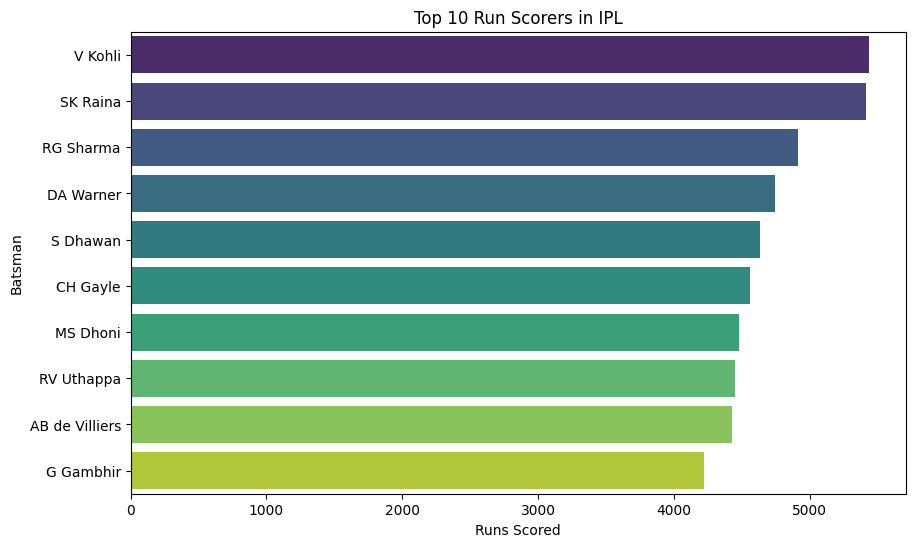

In [10]:
#top run scores 
top_runs = df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_runs.values, y=top_runs.index, palette='viridis')
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Runs Scored")
plt.ylabel("Batsman")
plt.show()


C:\Users\anush\AppData\Local\Temp\ipykernel_26596\2974869769.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wickets.values, y=top_wickets.index, palette='rocket')


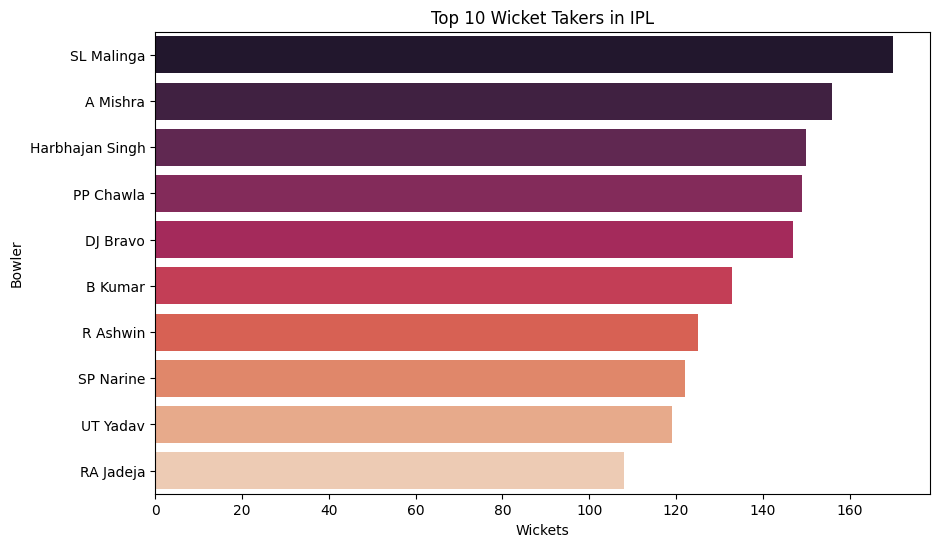

In [11]:
#top wicket takers
#only valid dismissals counted as wickets
valid_dismissals = ['caught', 'bowled', 'lbw', 'stumped', 'hit wicket', 'caught and bowled']

wicket_df = df[df['dismissal_kind'].isin(valid_dismissals)]
top_wickets = wicket_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_wickets.values, y=top_wickets.index, palette='rocket')
plt.title("Top 10 Wicket Takers in IPL")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()


In [14]:
#most runs by a batsman in a single match
batsman_match = df.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index()
top_match_scores = batsman_match.sort_values(by='batsman_runs', ascending=False).head(10)
top_match_scores


,match_id,batsman,batsman_runs
6200,411,CH Gayle,175
900,60,BB McCullum,158
8426,562,AB de Villiers,133
10149,7935,RR Pant,130
9257,620,AB de Villiers,129
5585,372,CH Gayle,128
3135,206,M Vijay,127
529,36,DA Warner,126
7752,516,V Sehwag,122
10417,7953,SR Watson,121


In [15]:
#max wickets by a bowler in a single match
bowler_match = wicket_df.groupby(['match_id', 'bowler'])['player_dismissed'].count().reset_index()
top_match_bowling = bowler_match.sort_values(by='player_dismissed', ascending=False).head(10)
top_match_bowling


,match_id,bowler,player_dismissed
4782,11310,A Joseph,6
579,83,Sohail Tanvir,6
4109,616,A Zampa,6
299,43,JD Unadkat,5
666,98,A Mishra,5
2103,313,RA Jadeja,5
625,91,L Balaji,5
1931,287,MM Patel,5
4417,7918,AS Rajpoot,5
84,13,AJ Tye,5


C:\Users\anush\AppData\Local\Temp\ipykernel_26596\1182616880.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wins', y='Team', data=match_wins, palette='cubehelix')


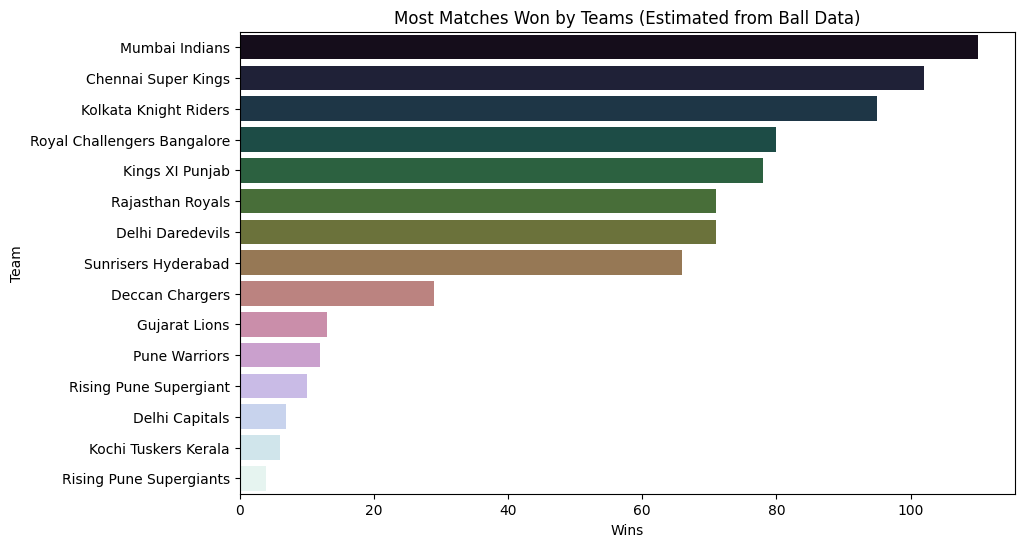

In [ ]:
#most matches won by a team
#team that scored higher in match -> considered winner
innings_total = df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

#get only first 2 innings (normal matches)
innings_total = innings_total[innings_total['inning'].isin([1, 2])]

#pivot innings side by side
match_totals = innings_total.pivot(index='match_id', columns='inning', values=['batting_team', 'total_runs']).dropna()
match_totals.columns = ['team1', 'team2', 'runs1', 'runs2']

#determine winner
match_totals['winner'] = match_totals.apply(lambda x: x['team1'] if x['runs1'] > x['runs2'] else x['team2'], axis=1)

#count wins
match_wins = match_totals['winner'].value_counts().reset_index()
match_wins.columns = ['Team', 'Wins']

#plot
plt.figure(figsize=(10,6))
sns.barplot(x='Wins', y='Team', data=match_wins, palette='cubehelix')
plt.title("Most Matches Won by Teams (Estimated from Ball Data)")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()


C:\Users\anush\AppData\Local\Temp\ipykernel_26596\3982632786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_runs.values, y=team_runs.index, palette='mako')


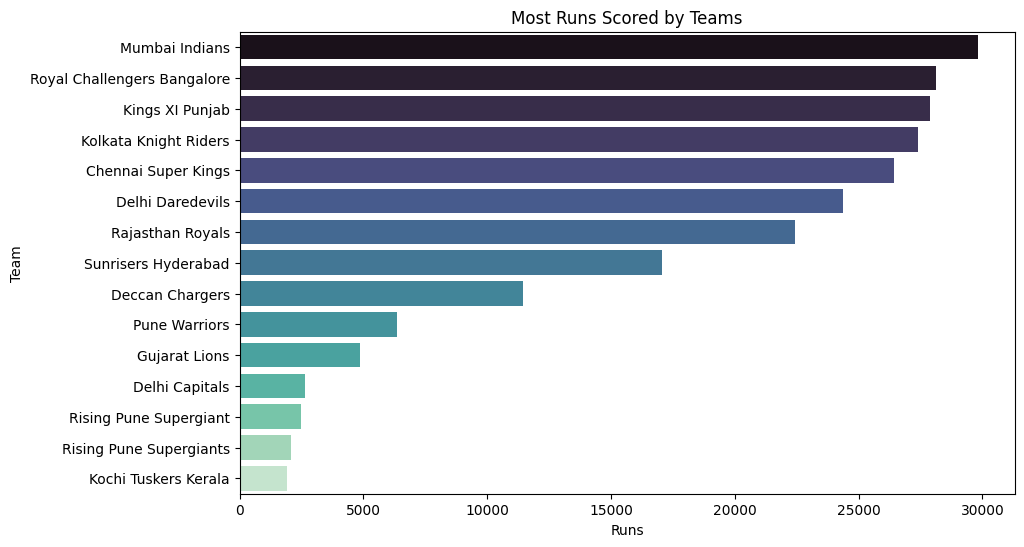

In [18]:
#most runs scored by a team
#total runs by each batting team
team_runs = df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

#plot
plt.figure(figsize=(10,6))
sns.barplot(x=team_runs.values, y=team_runs.index, palette='mako')
plt.title("Most Runs Scored by Teams")
plt.xlabel("Runs")
plt.ylabel("Team")
plt.show()


C:\Users\anush\AppData\Local\Temp\ipykernel_26596\2421250805.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wickets.values, y=team_wickets.index, palette='magma')


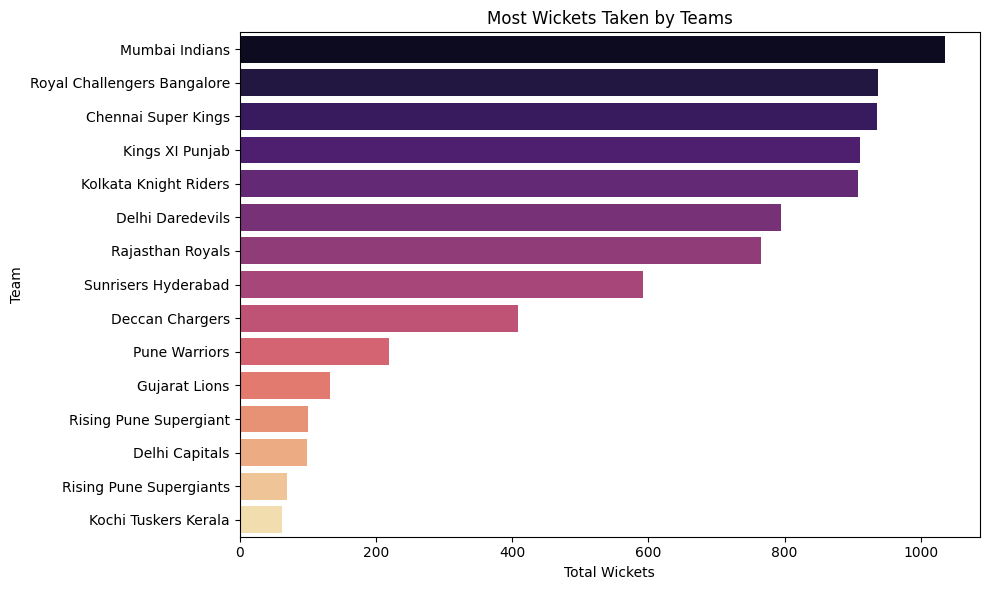

In [19]:
#most wickets taken by a team
# Valid dismissals (actual wickets)
valid_dismissals = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

# Filter rows where a wicket fell
wickets_df = df[df['dismissal_kind'].isin(valid_dismissals)]

#group by bowling team and count total dismissals
team_wickets = wickets_df.groupby('bowling_team')['player_dismissed'].count().sort_values(ascending=False)

#plot
plt.figure(figsize=(10,6))
sns.barplot(x=team_wickets.values, y=team_wickets.index, palette='magma')
plt.title("Most Wickets Taken by Teams")
plt.xlabel("Total Wickets")
plt.ylabel("Team")
plt.tight_layout()
plt.show()
